In [322]:
#import the packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

In [323]:
#OVERALL DATA

student_math = pd.read_csv("assignment3/student-mat.csv",sep=";")
student_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [324]:
student_math.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [325]:
student_math.info() #before

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Regression Tree

In [326]:
#to predict G1, y: G1

g1_studentmath = student_math
g1_studentmath.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [327]:
#to check the unique value in int64 data types

g1_studentmath['G1'].unique()

array([ 5,  7, 15,  6, 12, 16, 14, 10, 13,  8, 11,  9, 17, 19, 18,  4,  3],
      dtype=int64)

In [328]:
#to check the unique value in int64 data types
#not suitable to make it as categorical beacuse  too many numbers, only to remain int64
#this same goes to AGE,FAILURE(?)

g1_studentmath['absences'].unique()

array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
       28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17],
      dtype=int64)

In [329]:
#to check the unique value in int64 data types

g1_studentmath['failures'].unique()

array([0, 3, 2, 1], dtype=int64)

In [330]:
#to check the unique value in int64 data types

g1_studentmath['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

In [368]:
g1_studentmath['schoolsup'].unique()

array(['yes', 'no'], dtype=object)

In [331]:
#categorical variables = object
#to check the unique value in object data types

#In pandas, a categorical variable is a type of data that 
#represents a finite set of possible values, often referred to as categories or levels. 
#object dtypes can be used in categorical variables or other dtypes strings/datetime objects

g1_studentmath['Mjob'].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [332]:
# STEP 1: to convert the data types int64 into objects column to a categorical variable
#except age , failure and absence 


g1_studentmath['Medu'] = g1_studentmath['Medu'].astype('object')
g1_studentmath['Fedu'] = g1_studentmath['Fedu'].astype('object')
g1_studentmath['traveltime'] = g1_studentmath['traveltime'].astype('object')
g1_studentmath['studytime'] = g1_studentmath['studytime'].astype('object')
g1_studentmath['famrel'] = g1_studentmath['famrel'].astype('object')
g1_studentmath['freetime'] = g1_studentmath['freetime'].astype('object')
g1_studentmath['goout'] = g1_studentmath['goout'].astype('object')
g1_studentmath['Dalc'] = g1_studentmath['Dalc'].astype('object')
g1_studentmath['Walc'] = g1_studentmath['Walc'].astype('object')
g1_studentmath['health'] = g1_studentmath['health'].astype('object')

In [333]:
#after convert

g1_studentmath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [334]:
# STEP 2: Define the independent variable(object dtypes) columns to encode
# 

independent_variables_cate = ['school', 'sex','address','famsize','Pstatus','reason','guardian','Mjob','Fjob',
                                'schoolsup','famsup','paid','activities','nursery','higher','internet',
                                'romantic','Medu', 'Fedu', 'traveltime', 'studytime', 'famrel',
                                'freetime', 'goout', 'Dalc', 'Walc', 'health']

# STEP 3: Create dummy variables for the independent variable columns
g1_studentmath_new = pd.get_dummies(g1_studentmath,columns=independent_variables_cate)

C:\Users\NUR MARDHIAH\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [335]:
g1_studentmath_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 97 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   failures           395 non-null    int64
 2   absences           395 non-null    int64
 3   G1                 395 non-null    int64
 4   G2                 395 non-null    int64
 5   G3                 395 non-null    int64
 6   school_GP          395 non-null    uint8
 7   school_MS          395 non-null    uint8
 8   sex_F              395 non-null    uint8
 9   sex_M              395 non-null    uint8
 10  address_R          395 non-null    uint8
 11  address_U          395 non-null    uint8
 12  famsize_GT3        395 non-null    uint8
 13  famsize_LE3        395 non-null    uint8
 14  Pstatus_A          395 non-null    uint8
 15  Pstatus_T          395 non-null    uint8
 16  reason_course      395 non-null    uint8
 17  reason_home     

In [336]:
g1_studentmath_new

,age,failures,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,...,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,18,0,6,5,6,6,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,17,0,4,5,5,6,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,15,3,10,7,8,10,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,15,0,2,15,14,15,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,16,0,4,6,10,10,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,11,9,9,9,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
391,17,0,3,14,16,16,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
392,21,3,3,10,8,7,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
393,18,0,0,11,12,10,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [337]:
# Step 4: Define the target variable (y)
y = g1_studentmath_new['G1']

# Step 5: Drop(['G1', 'G2', 'G3'] : method that removes specified columns from the DataFrame
#axis=1 represents columns
X = g1_studentmath_new.drop(['G1', 'G2', 'G3'], axis=1) 

#X now holds the modified DataFrame without the specified columns
#useful to separate the features (independent variables:x) from the target variable (dependent variable:y)
#the dropped columns might represent the target variable

# Step 6: split data to 80:20 with random state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [338]:
X.head()

,age,failures,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,...,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,18,0,6,1,0,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
1,17,0,4,1,0,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
2,15,3,10,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,15,0,2,1,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,16,0,4,1,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1


In [339]:
y.head() #G1

0     5
1     5
2     7
3    15
4     6
Name: G1, dtype: int64

In [340]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

n= 10
best_max_depth = []
best_mse = float('inf') #initialized as positive infinity

# Iterate over maximum depth values
# the loop iterates from 1 to n-1, which in this case is 1 to 9
for max_depth in range (1,n): 
    # Create the Decision Tree Regressor
    regressor = DecisionTreeRegressor(max_depth=max_depth,random_state=1)
    
    # Train the model
    #trained model is used to make predictions on the testing set (X_test)
    #calculated by comparing the predicted values (y_pred) with the actual target values (y_test).
    regressor.fit(X_train, y_train)
    
    # Evaluate the model on the testing set
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # Check if current maximum depth gives better performance
    #if mse < best_mse,it means that the current maximum depth (max_depth) is giving better performance
    if mse < best_mse:
        best_mse = mse
        best_max_depth = max_depth

print("Best Maximum Depth:", best_max_depth)
print("Best Mean Squared Error:", best_mse)


Best Maximum Depth: 2
Best Mean Squared Error: 7.4594640215069905


In [341]:
#Choosing max depth 2
regr_tree_g1= DecisionTreeRegressor(max_depth = 2)
regr_tree_g1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [342]:
!pip install graphviz 

In [343]:
import os
os.environ["PATH"] += os.pathsep + 'D:/MACHINE_LEARNING/CODING/Graphviz/bin'

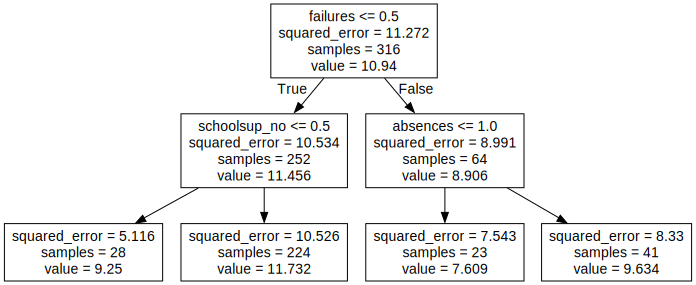

In [344]:
export_graphviz(regr_tree_g1, 
                out_file = "g1_reg_tree.dot", 
                feature_names = X_train.columns)

with open("g1_reg_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [366]:
from subprocess import check_call
check_call(['dot','-Tpng','g1_reg_tree.dot','-o','g1_reg_tree.png'])

0

7.4594640215069905

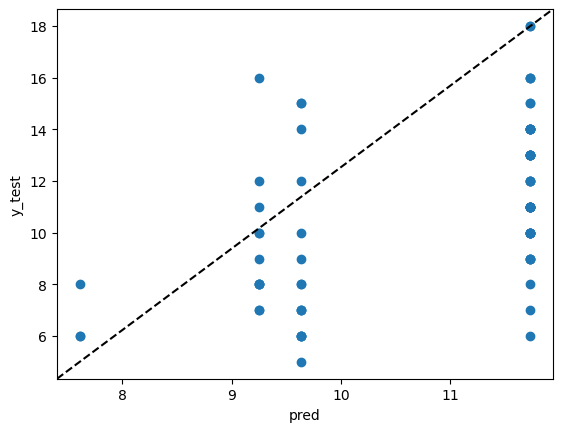

In [345]:
#prediction value vs test data

pred = regr_tree_g1.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'G1')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

# Classification trees

+ transform the variable G2 into new variable, G2T 

In [346]:
g2_studentmath = student_math
g2_studentmath.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [347]:
# STEP 1: to convert the data types int64 into objects column to a categorical variable
#except age , failure and absence 

g2_studentmath['Medu'] = g2_studentmath['Medu'].astype('object')
g2_studentmath['Fedu'] = g2_studentmath['Fedu'].astype('object')
g2_studentmath['traveltime'] = g2_studentmath['traveltime'].astype('object')
g2_studentmath['studytime'] = g2_studentmath['studytime'].astype('object')
g2_studentmath['famrel'] = g2_studentmath['famrel'].astype('object')
g2_studentmath['freetime'] = g2_studentmath['freetime'].astype('object')
g2_studentmath['goout'] = g2_studentmath['goout'].astype('object')
g2_studentmath['Dalc'] = g2_studentmath['Dalc'].astype('object')
g2_studentmath['Walc'] = g2_studentmath['Walc'].astype('object')
g2_studentmath['health'] = g2_studentmath['health'].astype('object')

In [348]:
g2_studentmath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [349]:
# STEP 2: Define the independent variable(object dtypes) columns to encode
# 

independent_variables_cate = ['school', 'sex','address','famsize','Pstatus','reason','guardian','Mjob','Fjob',
                                'schoolsup','famsup','paid','activities','nursery','higher','internet',
                                'romantic','Medu', 'Fedu', 'traveltime', 'studytime', 'famrel',
                                'freetime', 'goout', 'Dalc', 'Walc', 'health']

# STEP 3: Create dummy variables for the independent variable columns
g2_studentmath_new = pd.get_dummies(g2_studentmath,columns=independent_variables_cate)

C:\Users\NUR MARDHIAH\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [350]:
g2_studentmath_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 97 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   failures           395 non-null    int64
 2   absences           395 non-null    int64
 3   G1                 395 non-null    int64
 4   G2                 395 non-null    int64
 5   G3                 395 non-null    int64
 6   school_GP          395 non-null    uint8
 7   school_MS          395 non-null    uint8
 8   sex_F              395 non-null    uint8
 9   sex_M              395 non-null    uint8
 10  address_R          395 non-null    uint8
 11  address_U          395 non-null    uint8
 12  famsize_GT3        395 non-null    uint8
 13  famsize_LE3        395 non-null    uint8
 14  Pstatus_A          395 non-null    uint8
 15  Pstatus_T          395 non-null    uint8
 16  reason_course      395 non-null    uint8
 17  reason_home     

In [351]:
#to check the unique value in int64 data types

g2_studentmath['G2'].unique()

array([ 6,  5,  8, 14, 10, 15, 12, 18, 16, 13,  9, 11,  7, 19, 17,  4,  0],
      dtype=int64)

2.	Let say you transform the variable G2 into new variable, G2T which have five categories, such as 

+	0 to 4 into E, 
+	5 to 8 into D
+	9 to 12 into C
+	13 to 16 into B
+	17 to 20 into A

Build a classification tree to classify the G2T variable. 


In [352]:
# Define the function to map G2 values to categories
#categorize into more than 1 category

#Maps G2 values to categories based on specified ranges and labels
def map_G2_to_categories(value):  
        
# value: The value of G2 to be mapped.
    if value >= 0 and value <= 4:
        return 'E'
    elif value >= 5 and value <= 8:
        return 'D'
    elif value >= 9 and value <= 12:
        return 'C'
    elif value >= 13 and value <= 16:
        return 'B'
    elif value >= 17 and value <= 20:
        return 'A'
    else:
        return None  # Return None for values outside the specified ranges
    
# Create a new column 'G2T' by mapping 'G2' values using the function
g2_studentmath_new['G2T'] = g2_studentmath_new['G2'].map(map_G2_to_categories)
       
g2_studentmath_new.head()  #need to be in dummies           

,age,failures,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,...,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,G2T
0,18,0,6,5,6,6,1,0,1,0,...,0,0,0,0,0,0,1,0,0,D
1,17,0,4,5,5,6,1,0,1,0,...,0,0,0,0,0,0,1,0,0,D
2,15,3,10,7,8,10,1,0,1,0,...,0,1,0,0,0,0,1,0,0,D
3,15,0,2,15,14,15,1,0,1,0,...,0,0,0,0,0,0,0,0,1,B
4,16,0,4,6,10,10,1,0,1,0,...,1,0,0,0,0,0,0,0,1,C


In [353]:
g2_studentmath_new['G2T'].unique()

array(['D', 'B', 'C', 'A', 'E'], dtype=object)

In [354]:
# Step 4: Define the target variable (y)
y = g2_studentmath_new['G2T']

# Step 5: Drop(['G1', 'G2', 'G3','G2T'] : method that removes specified columns from the DataFrame
#axis=1 represents columns
X = g2_studentmath_new.drop(['G1', 'G2', 'G3','G2T'], axis=1) 

#X now holds the modified DataFrame without the specified columns
#useful to separate the features (independent variables:x) from the target variable (dependent variable:y)
#the dropped columns might represent the target variable

# Step 6: split data to 80:20 with random state=1
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [ ]:
y = g2_studentmath_new['G2T'] #step2
X = g2_studentmath_new.drop(['G1', 'G2', 'G3','G2T'], axis=1) #step3
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size = 0.8, random_state = 1)#step4

In [355]:
y.head() #G2T 

0    D
1    D
2    D
3    B
4    C
Name: G2T, dtype: object

In [356]:
X.head()  #independent variables:x

,age,failures,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,...,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,18,0,6,1,0,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
1,17,0,4,1,0,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
2,15,3,10,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,15,0,2,1,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,16,0,4,1,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1


In [357]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n= 10
best_max_depth = []
best_accuracy = 0

# Iterate over maximum depth values
# the loop iterates from 1 to n-1, which in this case is 1 to 9
for max_depth in range (1,n): 
    # Create the Decision Tree Classifier
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    
    # Train the model
    classifier.fit(X_train2, y_train2)
    
     # Make predictions on the testing set
    y_pred2= classifier.predict(X_test2)
    
    # Calculate the accuracy score - use for classification
    accuracy = metrics.accuracy_score(y_test2, y_pred2)
    
     # Check if current maximum depth gives better performance
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth
        
        
print("Best Maximum Depth:", best_max_depth)
print("Best Accuracy:", best_accuracy)

Best Maximum Depth: 1
Best Accuracy: 0.569620253164557


+ classification tasks with a decision tree classifier, accuracy is a commonly used metric to evaluate the performance of the model
+ Accuracy measures the proportion of correctly predicted labels (classifications) out of the total number of predictions.

+ Mean Squared Error (MSE) is typically used in regression tasks
+ MSE calculates the average squared difference between the predicted values and the true values.

++ Since classification involves discrete labels rather than continuous values, using MSE as an evaluation metric may not be appropriate.

In [358]:
#score on training data

classification_tree_g2 = DecisionTreeClassifier(max_depth = 1, random_state= 1)
classification_tree_g2.fit(X_train2, y_train2)
classification_tree_g2.score(X_train2, y_train2) 

0.40189873417721517

We see that the training accuracy is 40.189%.

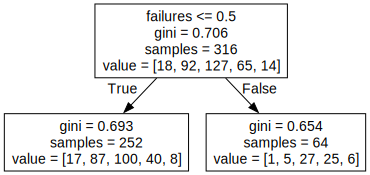

In [359]:
#export the output 
export_graphviz(classification_tree_g2, 
                out_file = "g2_reg_tree.dot", 
                feature_names = X_train2.columns)

with open("g2_reg_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [360]:
from subprocess import check_call
check_call(['dot','-Tpng','g2_reg_tree.dot','-o','g2_reg_tree.png'])

0

In [361]:
y_train2.value_counts() 

C    127
B     92
D     65
A     18
E     14
Name: G2T, dtype: int64

In [362]:
pred = classification_tree_g2.predict(X_test2) #used to make predictions on the X_test2 dataset.
cm = confusion_matrix(y_test2, pred) #predicted labels are stored in the 'pred' variable.

cm_df = pd.DataFrame(cm.T, index=['A', 'B', 'C', 'D'], 
                     columns=['A', 'B', 'C', 'D'])
print(cm_df)

   A   B   C   D
A  0   0   0   0
B  0   0   0   0
C  2  15  45  17
D  0   0   0   0


In [363]:
45/(2+15+17+45)  #to calculate the test data on confusion matrix

0.569620253164557

Confusion matrix, which shows that we are making correct predictions for around 56.962% of the test data set

the confusion_matrix function is called with the true labels (y_test2) and the predicted labels (pred) as arguments. It calculates the confusion matrix, which is a square matrix showing the counts of true positives, true negatives, false positives, and false negatives. 
+ (cm.T) The confusion matrix cm is transposed using .T to align the predicted labels with the rows and the actual labels with the columns of the DataFrame.

+ The purpose of this code is to compute and display the confusion matrix based on the predictions made by the decision tree classifier (classification_tree_g2) on the X_test2 dataset. The confusion matrix helps evaluate the performance of the classifier by showing how well it classifies instances into different categories.

In [364]:
#o evaluate in test data
#to check the shape of testing and pred of y 

#print(y_test2.shape)
#print(y_pred2.shape)

In [365]:
#to check the unique value

#print(set(y_test2))
#print(set(y_pred2))